# Can we make an EXPRES time series?

Adapted from Joe Llama (joe.llama@lowell.edu) for The Flatiron solar hack day (2023-03-15)

In [1]:
#%pylab notebook
from astropy.io import fits 
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request

In [126]:
order = 56
bin1 = 3920
n = 1
indexs = [str(i) for i in range(5065, 5353, 1)]

In [134]:
R = np.zeros(len(indexs))
V = np.zeros(len(indexs))
for idx, index in enumerate(indexs):
    filename = f'expres/Sun_220417.{index}.fits'  
    try:
        hdu = fits.open(filename)
        w = hdu[1].data['wavelength'] # Non-excalbiur wavelength solution, NOT barycentric corrected
        s = hdu[1].data['spectrum'] # Non-normalized spectrum 
        e = hdu[1].data['uncertainty'] # Uncertainty
        c = hdu[1].data['continuum'] # Continuum model
        t = hdu[1].data['tellurics'] 
        v = hdu[2].header['HIERARCH wtd_mdpt_bc']
        R[idx] = np.sum(s[order, bin1:bin1+n] / c[order, bin1:bin1+n])
        V[idx] = v
        print(w[order, bin1] - w[order, bin1-1])
    except:
        R[idx] = np.nan
        print(f'none on {idx}')

0.010839976220268
0.010839976224815473
0.010839975797352963
0.010839975528142531
0.010839975511771627
0.010839976239367388
0.010839975600902108
0.010839975358067022
0.010839975253475131
0.010839975145245262
0.010839975187991513
0.010839974580449052
none on 12
none on 13
0.010839974513146444
0.010839974894224724
0.010839974916052597
0.01083997483328858
0.010839974746886583
0.01083997466503206
0.010839975343515107
0.010839975263479573
0.010839975182534545
0.010839975109774969
0.010839974898772198
0.010839974819646159
0.010839974638656713
none on 27
none on 28
0.010839974514055939
0.010839974696864374
0.010839974382179207
0.010839974320333567
0.01083997426485439
0.010839974195732793
0.0108399741429821
0.010839974088412418
0.010839974030204758
0.01083997397654457
0.01083997391469893
0.010839973861948238
0.0108399734908744
0.01083997344085219
none on 43
none on 44
0.010839973339898279
0.010839973288966576
0.010839973238034872
0.010839973188922158
0.010839973144356918
0.010839973097972688
0.

[-2.53604878e-06 -2.54078431e-06 -2.54561726e-06 -2.55052016e-06
 -2.55559428e-06 -2.56075770e-06 -2.56602042e-06 -2.57143500e-06
 -2.57696097e-06 -2.58310207e-06 -2.58894311e-06 -2.59472981e-06
 -2.60523595e-06 -2.61126721e-06 -2.61742083e-06 -2.62361690e-06
 -2.63040233e-06 -2.63684345e-06 -2.64336288e-06 -2.65006976e-06
 -2.65680454e-06 -2.66363385e-06 -2.67052750e-06 -2.67744607e-06
 -2.68450307e-06 -2.69783040e-06 -2.70506427e-06 -2.71242349e-06
 -2.71981105e-06 -2.72729658e-06 -2.73479924e-06 -2.74246909e-06
 -2.75013070e-06 -2.75818256e-06 -2.76601277e-06 -2.77396325e-06
 -2.78199656e-06 -2.78996891e-06 -2.79807192e-06 -2.81328434e-06
 -2.82156052e-06 -2.82999680e-06 -2.83847270e-06 -2.84692442e-06
 -2.85560923e-06 -2.86438918e-06 -2.87309129e-06 -2.88185538e-06
 -2.89056215e-06 -2.89943048e-06 -2.90828200e-06 -2.91722101e-06
 -2.92623901e-06 -2.94338703e-06 -2.95248666e-06 -2.96174425e-06
 -2.97096783e-06 -2.98026011e-06 -2.98966509e-06 -3.00038985e-06
 -3.01074694e-06 -3.02146

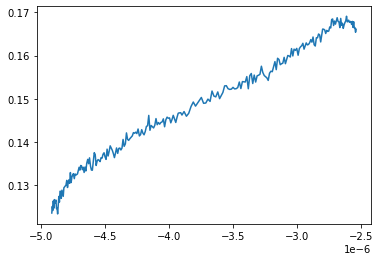

In [128]:
V = V[~np.isnan(R)]
R = R[~np.isnan(R)]
print(V)
print(R)
plt.plot(V, R)

In [129]:

r = np.polyfit(V, R, 4)
print(r)

[-4.00715935e+21 -5.68783503e+16 -2.97960037e+11 -6.66366508e+05
 -3.67314393e-01]


Text(0, 0.5, 'Ratio')

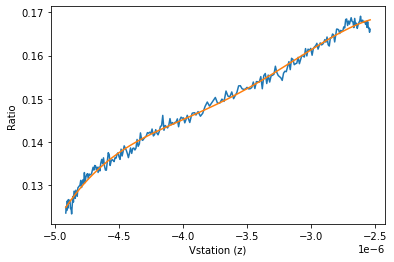

In [130]:
plt.plot(V, R)
plt.plot(V, np.poly1d(r)(V))
plt.xlabel('Vstation (z)')
plt.ylabel('Ratio')

In [131]:
ri = r[::-1]
cal = np.sum([i * ri[i] * V**(i-1)for i in range(len(r))], axis=0)
print(cal)

[ 8907.55085546  9094.50431269  9283.06277045  9472.04851319
  9665.20472581  9859.23611327 10054.39328218 10252.45040374
 10451.74150406 10669.87020846 10874.0914032  11073.30805471
 11427.16075202 11625.76586789 11825.02076931 12022.22407703
 12234.2683129  12431.79129009 12628.01125639 12826.01226663
 13020.92579399 13214.60340697 13406.08003619 13594.21444019
 13781.98214481 14125.32640097 14305.58943645 14484.62028301
 14659.96068106 14833.18969652 15002.37466819 15170.77623892
 15334.44397222 15501.59152461 15659.41112326 15814.93392138
 15967.29462102 16113.79571191 16257.94654757 16515.81299253
 16649.20848825 16780.25585527 16906.96600216 17028.42974786
 17148.2225977  17264.21868197 17374.18130322 17479.95542324
 17580.16101806 17677.29508099 17769.34913039 17857.41726166
 17941.34770412 18087.57579866 18158.19098171 18225.16137896
 18287.07579303 18344.67306354 18398.1638611  18453.36370666
 18500.9145372  18544.28926046 18578.07150411 18608.843173
 18633.53667149 18653.8732

(-30.0, 30.0)

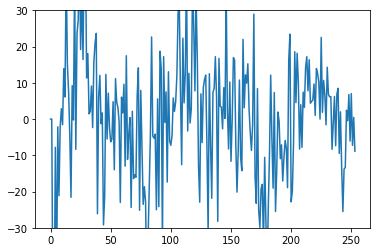

In [132]:
V_resid = (R - np.poly1d(r)(V)) / cal * 3e8
V_resid[np.abs(V_resid) > 3*np.std(V_resid)] = 0.0
plt.plot(V_resid)
plt.ylim([-30, 30])